# Generate some fake data from a mixture of randomly placed Gaussians.

In [12]:
%matplotlib inline
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng

In [13]:
def random_rotation(C, angle):
    invC = np.linalg.inv(C)
    R = np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]]) # rotation matrix
    invC = np.dot(np.linalg.inv(R), np.dot(invC, R))
    C = np.linalg.inv(invC)
    return invC, C

In [14]:
D = 2    # number of dimensions
K = 5   # number of components
N = 1000 # number of data points

out_stem = 'test-MoG'
out_file = out_stem + '.csv'

In [15]:
prior = 0.2 + 0.8*rng.random((1,K))    # mixing coefficients
prior = prior / np.sum(prior)             # normalisation

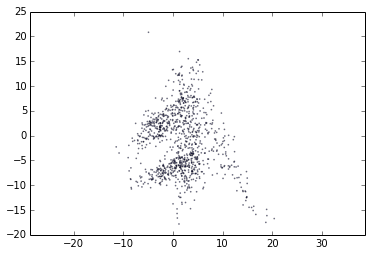

In [16]:
covariances = []
centers = []
for k in range(K):
    centers.append(5 * rng.normal(0.0,1.0,(D)))
    C = np.array([[0.01+0.99*rng.random(), 0.0],[0.0, 0.01+0.1*rng.random()]])
    angle = rng.random() * math.pi
    C, invC = random_rotation(C, angle)

    #c = 0.1 + 1.0*rng.random((D,D))
    #c[1,0] = rng.normal(0.0,1.0)
    #c[0,1] = c[1,0] #symmetric
    covariances.append(C)

# generate samples from this mixture of Gaussians
data = np.zeros((N,D))
for i in range(N):
    # choose a component
    j = np.sum(rng.random() > np.cumsum(prior))
    # Now choose a data point using that component of the mixture
    x,y = rng.multivariate_normal(centers[j],covariances[j],1).T
    data[i,0] = x
    data[i,1] = y

# show the samples as a scatter plot
plt.scatter(data[:,0], data[:,1], marker='o',s=.5,linewidths=None,alpha=0.5)
plt.axis('equal')    
plt.draw()

Save it as a PNG file, just for kicks.

In [20]:
out_imagename = out_stem + '.png'
plt.savefig(out_imagename)
print ('saved image %s' % out_imagename)

saved image test-MoG.png


Now write a datafile consisting of a matrix, in which each row is a
training item. Ground truth is lost in this file: the true class is not
written, just the vector...

In [18]:
# write the samples to a file
np.savetxt(out_file, data, fmt="%12.6G",)
print ('wrote data file %s' %out_file)

wrote data file test-MoG.csv
